#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03C Measurig home team advantage in football**

using the football dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from plotnine import ggplot, aes, geom_histogram
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/epl_games.csv")
#df = pd.read_csv("https://osf.io/bdjt5/download")

In [3]:
df.columns.values

array(['div', 'season', 'date', 'team_home', 'team_away', 'points_home',
       'points_away', 'goals_home', 'goals_away'], dtype=object)

In [ ]:
# creating a new df with only the 2012 season
df_new = df[df["season"] == 2012]

In [ ]:
# creating an old df with only the 2012=1 season
df_old = df[df["season"] == 2011]

In [67]:
home_goals = df_old.groupby("team_home")["goals_home"].sum()
away_goals = df_old.groupby("team_away")["goals_away"].sum()
goal_sum = (home_goals + away_goals).reset_index()
goal_sum
goal_sum = goal_sum.sort_values(0, ascending=False)
goal_sum

,team_home,0
8,Man City,93
9,Man United,89
0,Arsenal,74
16,Tottenham,66
4,Chelsea,65
10,Newcastle,56
11,Norwich,52
5,Everton,50
2,Blackburn,48
6,Fulham,48


In [68]:
goal_sum_df = goal_sum.rename(columns={"team_home": "team", 0: "goal_sum"})
goal_sum_df
group_labels = ['Top', 'Medium', 'Bottom']
goal_sum_df['group'] = pd.qcut(goal_sum_df['goal_sum'], q=3, labels=group_labels[::-1])
goal_sum_df

,team,goal_sum,group
8,Man City,93,Top
9,Man United,89,Top
0,Arsenal,74,Top
16,Tottenham,66,Top
4,Chelsea,65,Top
10,Newcastle,56,Top
11,Norwich,52,Top
5,Everton,50,Medium
2,Blackburn,48,Medium
6,Fulham,48,Medium


In [69]:
df_new["group_home"] = df_new["team_home"].map(dict(zip(goal_sum_df["team"], goal_sum_df["group"]))).fillna("Bottom")
df_new["group_away"] = df_new["team_away"].map(dict(zip(goal_sum_df["team"], goal_sum_df["group"]))).fillna("Bottom")
df_new

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,group_home,group_away,home_goaladv,goaladv_bin,home_adv,grpup_home_cat,group_home_cat
1520,E0,2012,18aug2012,West Ham,Aston Villa,3,0,1,0,Bottom,Bottom,1,"(-0.4, 1.0]",1,1,1
1521,E0,2012,18aug2012,Arsenal,Sunderland,1,1,0,0,Top,Bottom,0,"(-0.4, 1.0]",0,3,3
1522,E0,2012,18aug2012,Reading,Stoke,1,1,1,1,Bottom,Bottom,0,"(-0.4, 1.0]",0,1,1
1523,E0,2012,18aug2012,Newcastle,Tottenham,3,0,2,1,Top,Top,1,"(-0.4, 1.0]",1,3,3
1524,E0,2012,18aug2012,Fulham,Norwich,3,0,5,0,Medium,Top,5,"(3.8, 5.2]",1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,2012,19may2013,Newcastle,Arsenal,0,3,0,1,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1896,E0,2012,19may2013,Chelsea,Everton,3,0,2,1,Top,Medium,1,"(-0.4, 1.0]",1,3,3
1897,E0,2012,19may2013,Man City,Norwich,0,3,2,3,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1898,E0,2012,19may2013,Swansea,Fulham,0,3,0,3,Bottom,Medium,-3,"(-3.2, -1.8]",0,1,1


In [66]:
df_new["home_adv"] = (df_new["home_goaladv"] >= 1).astype(int)
df_new["group_home_cat"] = df_new["group_home"].map({"Top": 3, "Medium": 2, "Bottom": 1}).astype(int)
df_new

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,group_home,group_away,home_goaladv,goaladv_bin,home_adv,grpup_home_cat,group_home_cat
1520,E0,2012,18aug2012,West Ham,Aston Villa,3,0,1,0,Bottom,Bottom,1,"(-0.4, 1.0]",1,1,1
1521,E0,2012,18aug2012,Arsenal,Sunderland,1,1,0,0,Top,Bottom,0,"(-0.4, 1.0]",0,3,3
1522,E0,2012,18aug2012,Reading,Stoke,1,1,1,1,Bottom,Bottom,0,"(-0.4, 1.0]",0,1,1
1523,E0,2012,18aug2012,Newcastle,Tottenham,3,0,2,1,Top,Top,1,"(-0.4, 1.0]",1,3,3
1524,E0,2012,18aug2012,Fulham,Norwich,3,0,5,0,Medium,Top,5,"(3.8, 5.2]",1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,2012,19may2013,Newcastle,Arsenal,0,3,0,1,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1896,E0,2012,19may2013,Chelsea,Everton,3,0,2,1,Top,Medium,1,"(-0.4, 1.0]",1,3,3
1897,E0,2012,19may2013,Man City,Norwich,0,3,2,3,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1898,E0,2012,19may2013,Swansea,Fulham,0,3,0,3,Bottom,Medium,-3,"(-3.2, -1.8]",0,1,1


In [31]:
home_cov = df_new["home_adv"].cov(df_new["group_home_cat"])
home_cov

np.float64(0.12902374670184708)

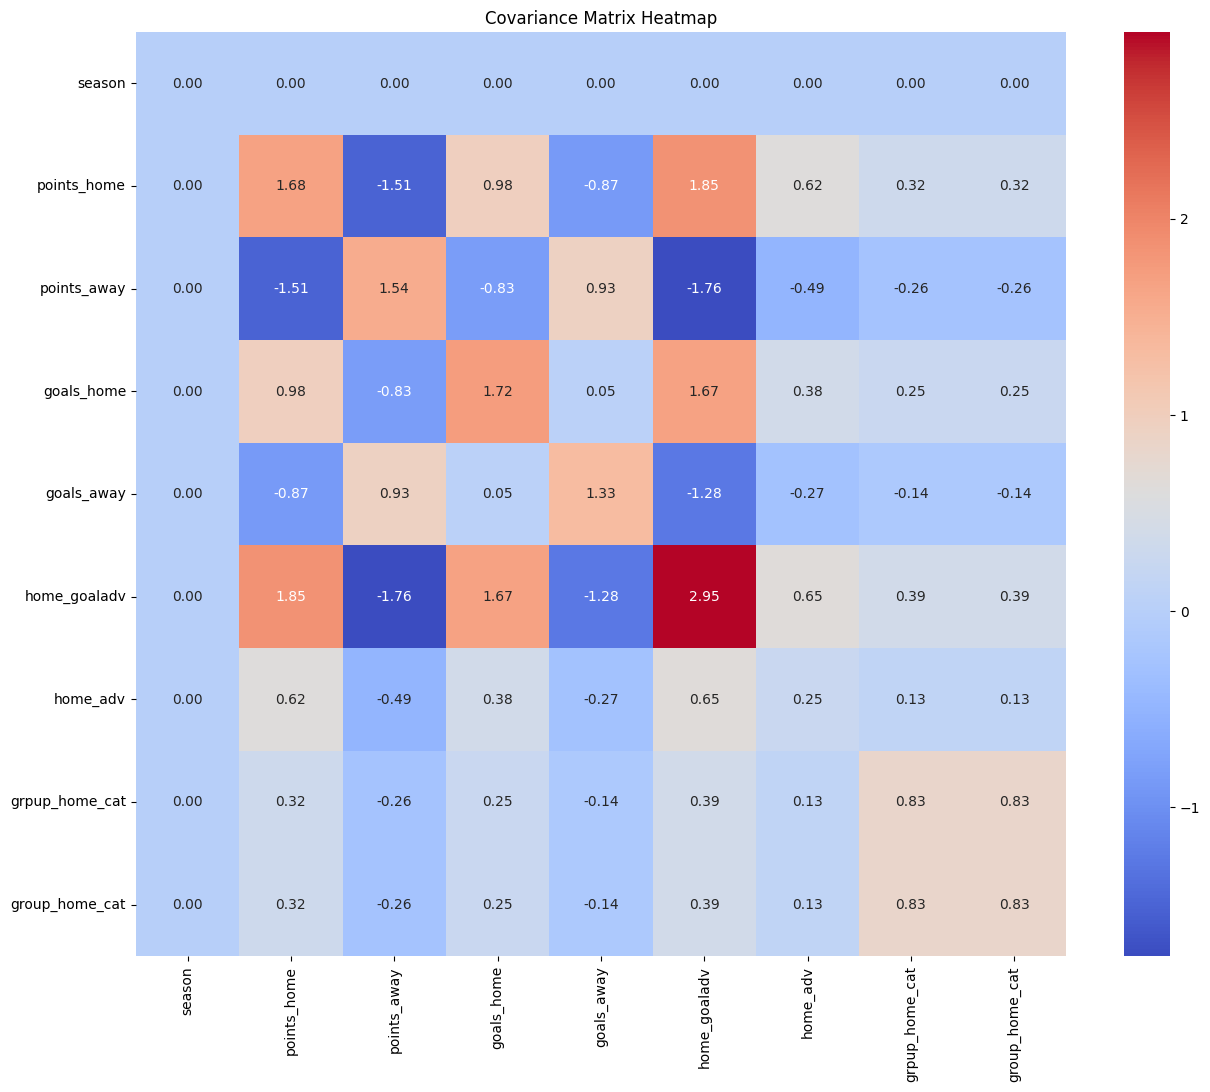

In [32]:
import seaborn as sns

# Compute covariance matrix for numerical columns
cov_matrix = df_new.select_dtypes(include=[np.number]).cov()

# Plot the covariance matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix Heatmap")
plt.show()

In [ ]:
# Example: count how many unique home teams played in the 2011 season
df_2011 = df[df['season'] == 2011]['team_home'].unique()
df_2011

array(['Newcastle', 'Blackburn', 'QPR', 'Liverpool', 'Fulham', 'Wigan',
       'West Brom', 'Stoke', 'Man City', 'Chelsea', 'Everton', 'Swansea',
       'Aston Villa', 'Arsenal', 'Sunderland', 'Bolton', 'Wolves',
       'Norwich', 'Man United', 'Tottenham'], dtype=object)

In [13]:
# Count how many times 'NPlayed' appears in the 'group_home' column
df_new['group_home'].value_counts()['New']


np.int64(57)

In [14]:
# Count how many times 'NPlayed' appears in the 'group_home' column
df_new['group_away'].value_counts()['New']


np.int64(57)

## Goal Difference

In [15]:
df_new["home_goaladv"] = df_new["goals_home"] - df_new["goals_away"]

In [16]:
df_new["home_goaladv"].describe()

count    380.000000
mean       0.318421
std        1.717880
min       -6.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: home_goaladv, dtype: float64

In [17]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            df_new["home_goaladv"].describe()["mean"],
            df_new["home_goaladv"].describe()["std"],
            (df_new["home_goaladv"] > 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            (df_new["home_goaladv"] == 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            (df_new["home_goaladv"] < 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            df_new["home_goaladv"].describe()["count"],
        ],
    }
).round(1)

,Statistics,Value
0,Mean,0.3
1,Standard deviation,1.7
2,Percent positive,43.7
3,Percent zero,28.4
4,Percent negative,27.9
5,Number of observations,380.0


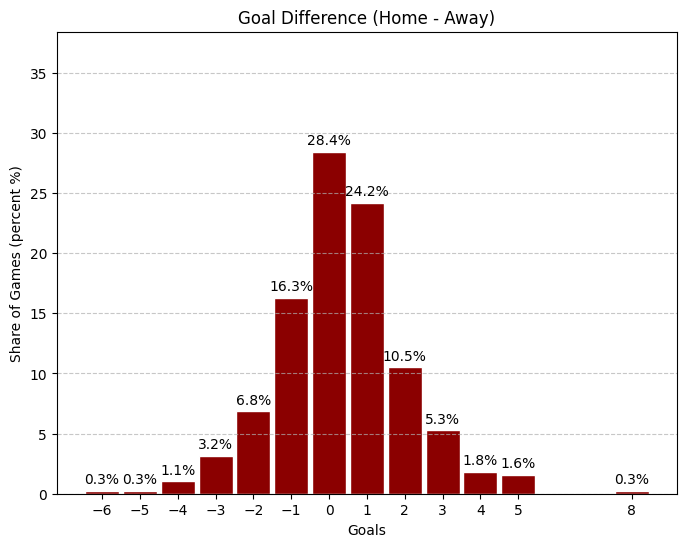

In [ ]:
perc = df_new["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff = sorted(df_new["home_goaladv"].dropna().unique())

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff, perc.values, color="darkred", edgecolor="white", width=0.9)


# Add labels above bars
ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc.values], padding=3)

# Formatting
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Games (percent %)")
ax.set_title("Goal Difference (Home - Away)")
ax.set_xticks(goal_diff)
ax.set_ylim(0, perc.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



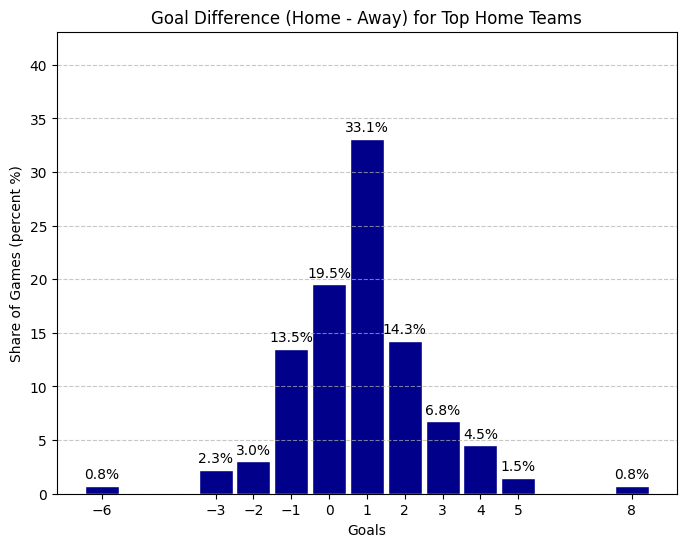

In [36]:
# Filter for only 'Top' group_home
df_top = df_new[df_new['group_home'] == 'Top']

perc_top = df_top["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff_top = sorted(df_top["home_goaladv"].dropna().unique())

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff_top, perc_top.values, color="darkblue", edgecolor="white", width=0.9)

ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc_top.values], padding=3)
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Games (percent %)")
ax.set_title("Goal Difference (Home - Away) for Top Home Teams")
ax.set_xticks(goal_diff_top)
ax.set_ylim(0, perc_top.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [55]:
df_top.home_goaladv.describe()

count    133.000000
mean       0.827068
std        1.777431
min       -6.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: home_goaladv, dtype: float64

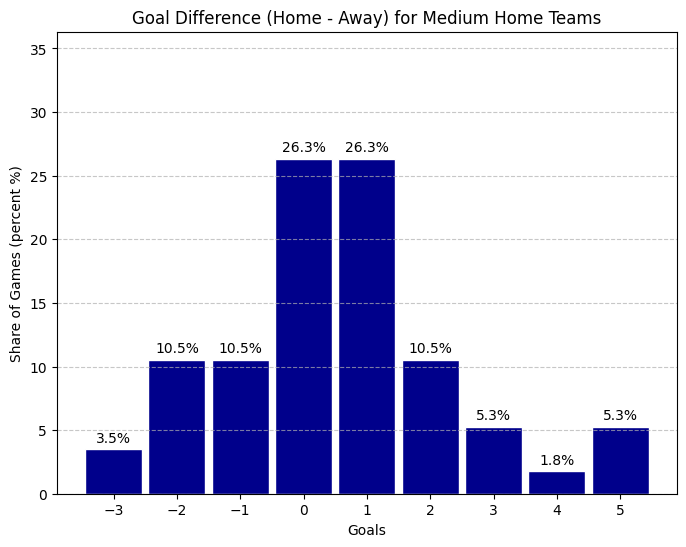

In [53]:
# Filter for only 'Top' group_home
df_med = df_new[df_new['group_home'] == 'Medium']

perc_med = df_med["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff_med = sorted(df_med["home_goaladv"].dropna().unique())

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff_med, perc_med.values, color="darkblue", edgecolor="white", width=0.9)

ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc_med.values], padding=3)
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Games (percent %)")
ax.set_title("Goal Difference (Home - Away) for Medium Home Teams")
ax.set_xticks(goal_diff_med)
ax.set_ylim(0, perc_med.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [56]:
df_med.home_goaladv.describe()

count    57.000000
mean      0.543860
std       1.832935
min      -3.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       5.000000
Name: home_goaladv, dtype: float64

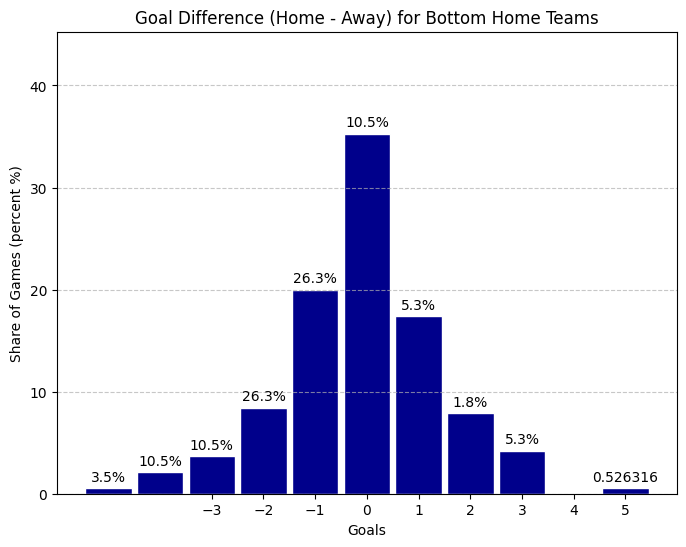

In [57]:
# Filter for only 'Top' group_home
df_bot = df_new[df_new['group_home'] == 'Bottom']

perc_bot = df_bot["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff_bot = sorted(df_bot["home_goaladv"].dropna().unique())

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff_bot, perc_bot.values, color="darkblue", edgecolor="white", width=0.9)

ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc_med.values], padding=3)
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Games (percent %)")
ax.set_title("Goal Difference (Home - Away) for Bottom Home Teams")
ax.set_xticks(goal_diff_med)
ax.set_ylim(0, perc_bot.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [58]:
df_bot.home_goaladv.describe()

count    190.000000
mean      -0.105263
std        1.529074
min       -5.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: home_goaladv, dtype: float64

In [73]:
goal_sum_df

,team,goal_sum,group
8,Man City,93,Top
9,Man United,89,Top
0,Arsenal,74,Top
16,Tottenham,66,Top
4,Chelsea,65,Top
10,Newcastle,56,Top
11,Norwich,52,Top
5,Everton,50,Medium
2,Blackburn,48,Medium
6,Fulham,48,Medium


In [75]:
team_score_df = team_score_df.merge(goal_sum_df[['team', 'goal_sum']], on='team', how='left')
team_score_df['goal_sum'] = team_score_df['goal_sum'].fillna(0)
team_score_df = team_score_df[['team', 'home_adv_sum', 'goal_sum', 'group_home']]
team_score_df = team_score_df.sort_values(by='home_adv_sum', ascending=False)
team_score_df


,team,home_adv_sum,goal_sum,group_home
0,Man United,16,89.0,Top
1,Man City,14,93.0,Top
2,Everton,12,50.0,Medium
3,Chelsea,12,65.0,Top
4,Tottenham,11,66.0,Top
5,Arsenal,11,74.0,Top
6,West Brom,9,45.0,Bottom
7,Liverpool,9,47.0,Medium
8,Newcastle,9,56.0,Top
9,West Ham,9,0.0,Bottom


In [76]:
home_cov2 = team_score_df["home_adv_sum"].cov(team_score_df["goal_sum"])
home_cov2

np.float64(61.810526315789474)

In [77]:
home_corr2 = team_score_df["home_adv_sum"].corr(team_score_df["goal_sum"])
home_corr2

np.float64(0.6717949601390747)

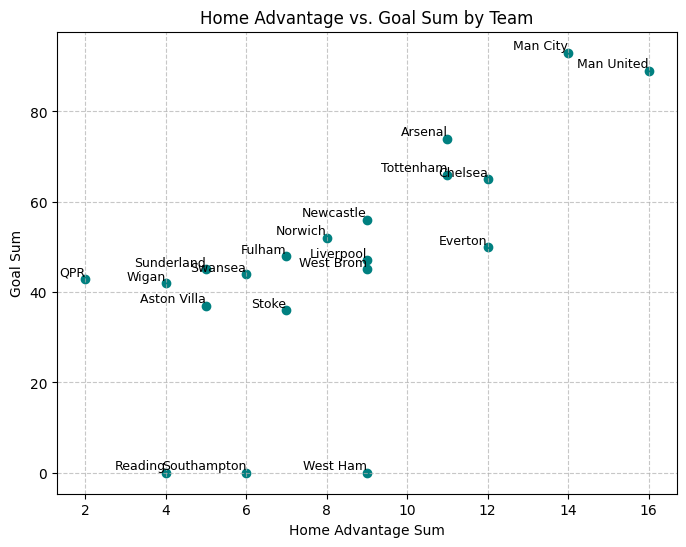

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(team_score_df['home_adv_sum'], team_score_df['goal_sum'], color='teal')
for i, row in team_score_df.iterrows():
    plt.text(row['home_adv_sum'], row['goal_sum'], row['team'], fontsize=9, ha='right', va='bottom')
plt.xlabel('Home Advantage Sum')
plt.ylabel('Goal Sum')
plt.title('Home Advantage vs. Goal Sum by Team')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

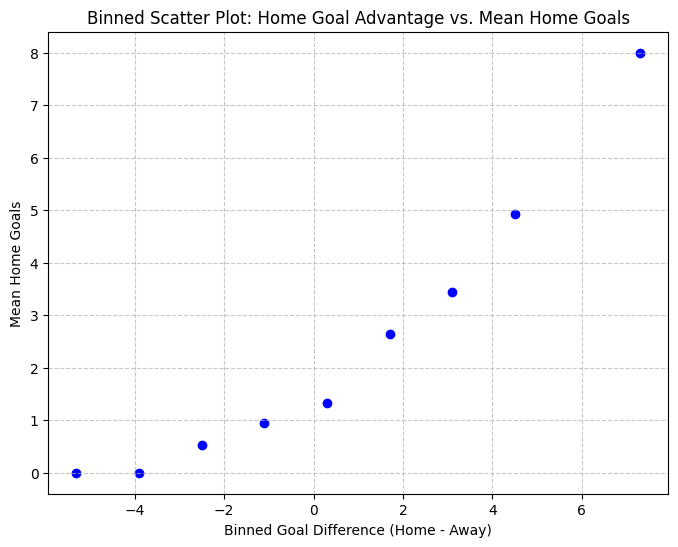

In [22]:
# Bin the home_goaladv values and calculate the mean goals_home for each bin
df_new['goaladv_bin'] = pd.cut(df_new['home_goaladv'], bins=10)
bin_means = df_new.groupby('goaladv_bin')['goals_home'].mean()
bin_centers = [interval.mid for interval in bin_means.index]

plt.figure(figsize=(8, 6))
plt.scatter(bin_centers, bin_means, color='blue')
plt.xlabel('Binned Goal Difference (Home - Away)')
plt.ylabel('Mean Home Goals')
plt.title('Binned Scatter Plot: Home Goal Advantage vs. Mean Home Goals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [79]:
df_new

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,group_home,group_away,home_goaladv,goaladv_bin,home_adv,grpup_home_cat,group_home_cat
1520,E0,2012,18aug2012,West Ham,Aston Villa,3,0,1,0,Bottom,Bottom,1,"(-0.4, 1.0]",1,1,1
1521,E0,2012,18aug2012,Arsenal,Sunderland,1,1,0,0,Top,Bottom,0,"(-0.4, 1.0]",0,3,3
1522,E0,2012,18aug2012,Reading,Stoke,1,1,1,1,Bottom,Bottom,0,"(-0.4, 1.0]",0,1,1
1523,E0,2012,18aug2012,Newcastle,Tottenham,3,0,2,1,Top,Top,1,"(-0.4, 1.0]",1,3,3
1524,E0,2012,18aug2012,Fulham,Norwich,3,0,5,0,Medium,Top,5,"(3.8, 5.2]",1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,2012,19may2013,Newcastle,Arsenal,0,3,0,1,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1896,E0,2012,19may2013,Chelsea,Everton,3,0,2,1,Top,Medium,1,"(-0.4, 1.0]",1,3,3
1897,E0,2012,19may2013,Man City,Norwich,0,3,2,3,Top,Top,-1,"(-1.8, -0.4]",0,3,3
1898,E0,2012,19may2013,Swansea,Fulham,0,3,0,3,Bottom,Medium,-3,"(-3.2, -1.8]",0,1,1


## Condtional Summary Statistcis

In [ ]:
(
    ggplot(df_new, aes(x="group_home_cat", y="home", group="group_home"))
    + stat_boxplot(
        geom="errorbar",
        width=0.5,
        color=("green", "navy", "purple"),
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        color=("green", "navy", "purple"), size=0.5, width=0.5, na_rm=True
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=np.arange(1, 5, 1))
    + theme_bw()
)